In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('C:/USERS/YASHN/TEMPERATURE PREDICTION.CSV')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
# Checking the dimensions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [4]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [5]:
# Checking null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We have many null values in our dataset.

In [6]:
# dropping all null values
df=df.dropna()

In [7]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

All null values have been removed.

<AxesSubplot:>

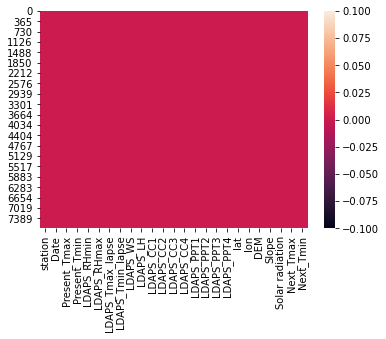

In [8]:
# Plotting heatmap
sns.heatmap(df.isnull())

In [9]:
# Statistical Summary
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [10]:
# Checking Correlation
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


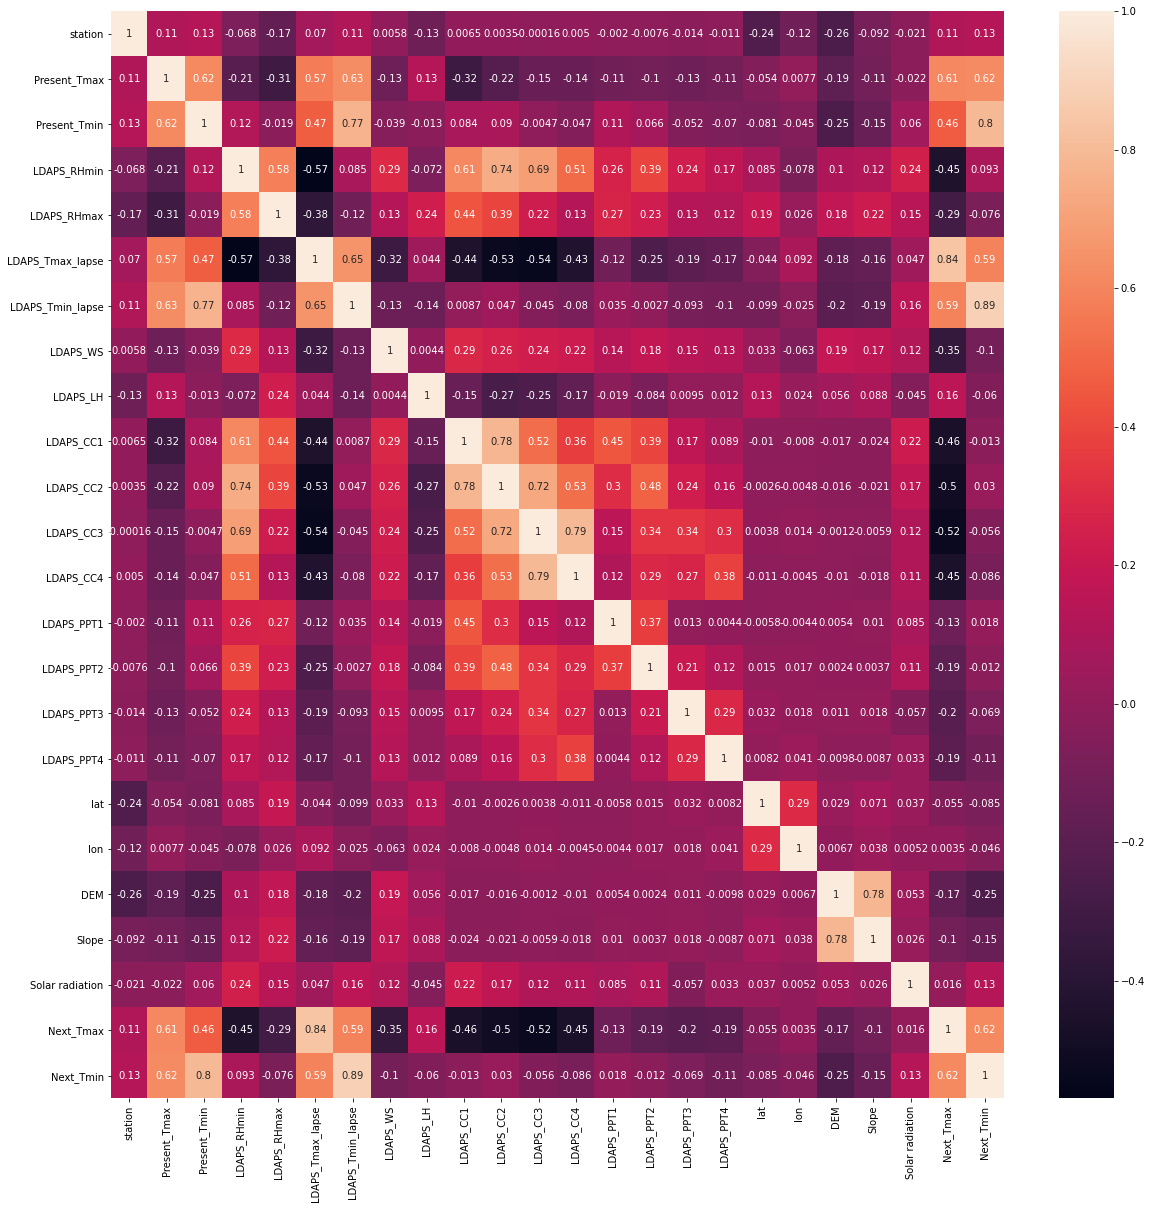

In [11]:
corr_hmap=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()

We can observe Present_Tmax, Present_Tmin, LDAPS_RHmin, LDAPS_RHmax are highly correlated with the target variables. Next_Tmin and Next_Tmax are  highly correlated with exch other and most of the columns are negatively correlated with target variables.

In [12]:
# Checking unique values
df.nunique()

station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

In [13]:
df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str
df.drop(columns=['Date'], inplace=True)

In [14]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,06,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,06,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,06,2013


<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

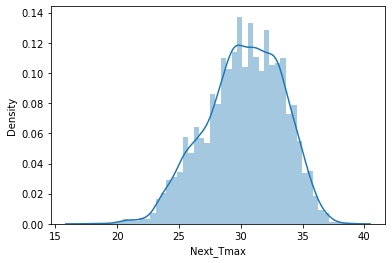

In [15]:
sns.distplot(df['Next_Tmax'])

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

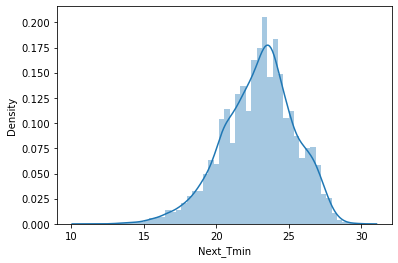

In [16]:
sns.distplot(df['Next_Tmin'])

array([[<AxesSubplot:title={'center':'station'}>,
        <AxesSubplot:title={'center':'Present_Tmax'}>,
        <AxesSubplot:title={'center':'Present_Tmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmax'}>,
        <AxesSubplot:title={'center':'LDAPS_Tmax_lapse'}>,
        <AxesSubplot:title={'center':'LDAPS_Tmin_lapse'}>,
        <AxesSubplot:title={'center':'LDAPS_WS'}>,
        <AxesSubplot:title={'center':'LDAPS_LH'}>,
        <AxesSubplot:title={'center':'LDAPS_CC1'}>],
       [<AxesSubplot:title={'center':'LDAPS_CC2'}>,
        <AxesSubplot:title={'center':'LDAPS_CC3'}>,
        <AxesSubplot:title={'center':'LDAPS_CC4'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT1'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT2'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT3'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT4'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>,

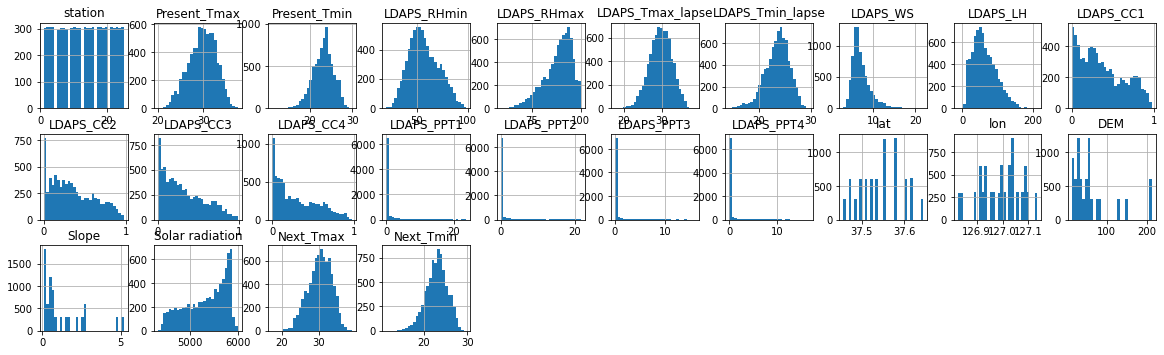

In [17]:
# plotting a histogram
df.hist(figsize=(20,20), grid = True, layout = (10,10), bins = 30)

Text(0, 0.5, 'Next_Tmin')

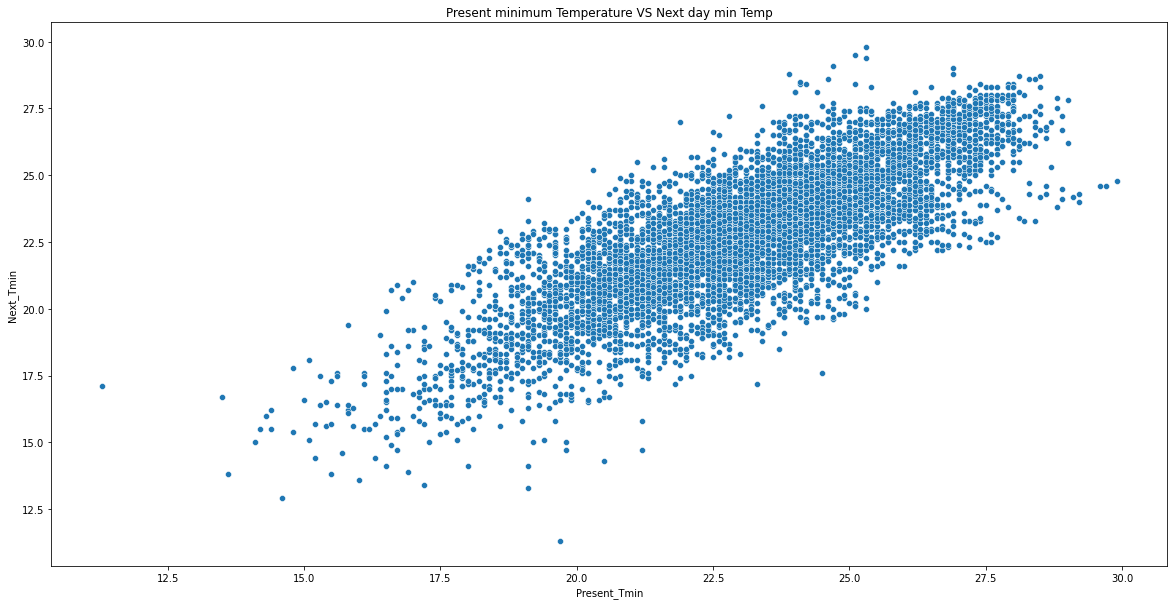

In [18]:
plt.figure(figsize=(20,10))
plt.title('Present minimum Temperature VS Next day min Temp')
sns.scatterplot(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

Text(0, 0.5, 'Next_Tmax')

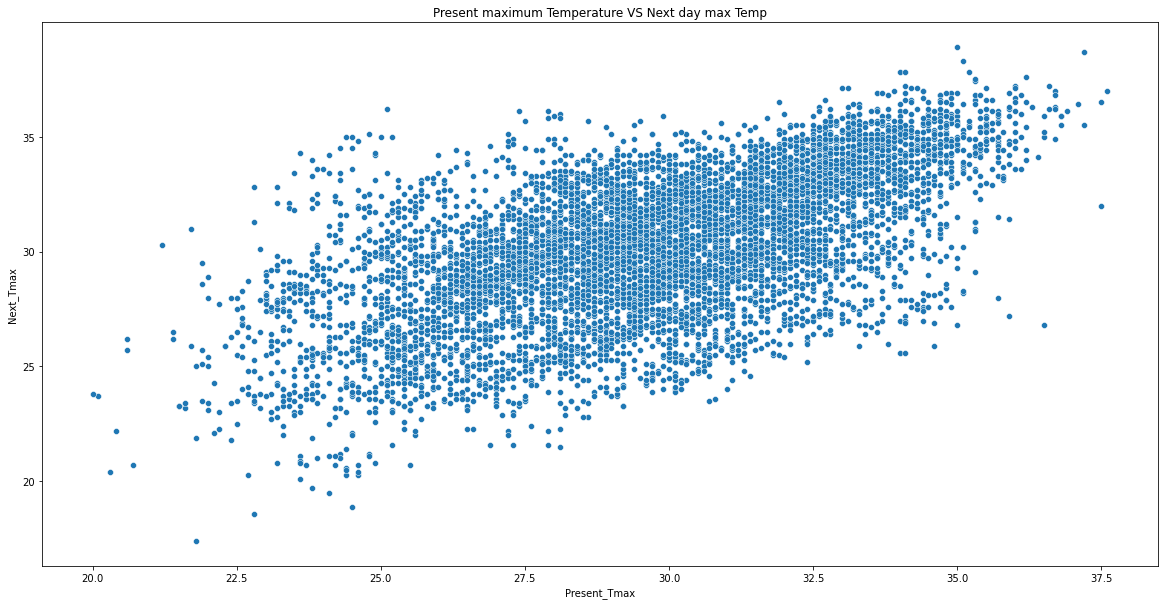

In [19]:
plt.figure(figsize=(20,10))
plt.title('Present maximum Temperature VS Next day max Temp')
sns.scatterplot(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

In [20]:
# Converting categorical data to numerical
df = df.copy()
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [21]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,0,80,73,4400,4391,2255,2839,4278,4763,2713,...,9,11,24,22,1574,92,75,29,0,0
1,1,112,75,3224,4136,3929,4186,1928,3306,2612,...,9,16,11,9,1531,106,88,29,0,0
2,2,109,92,2450,1835,4186,4953,2925,726,2407,...,8,19,9,5,1517,112,102,29,0,0
3,3,113,93,4396,6863,3786,3230,1855,4513,2503,...,11,14,12,20,1500,118,106,29,0,0
4,4,107,78,4005,3951,3208,3426,2020,6767,1847,...,7,24,10,8,1510,113,88,29,0,0


In [22]:
# Checking Skewness
df.skew()

station            -0.004178
Present_Tmax       -0.253796
Present_Tmin       -0.340918
LDAPS_RHmin        -0.000347
LDAPS_RHmax        -0.000977
LDAPS_Tmax_lapse    0.000000
LDAPS_Tmin_lapse    0.000000
LDAPS_WS            0.000000
LDAPS_LH            0.000000
LDAPS_CC1           0.001833
LDAPS_CC2           0.001473
LDAPS_CC3           0.001046
LDAPS_CC4           0.004249
LDAPS_PPT1          1.396285
LDAPS_PPT2          1.571196
LDAPS_PPT3          1.670148
LDAPS_PPT4          2.000546
lat                -0.344089
lon                -0.002068
DEM                -0.001380
Slope              -0.000935
Solar radiation    -0.015351
Next_Tmax          -0.323890
Next_Tmin          -0.379590
Year               -0.010718
Month              -0.174856
Day                 0.013575
dtype: float64

<AxesSubplot:>

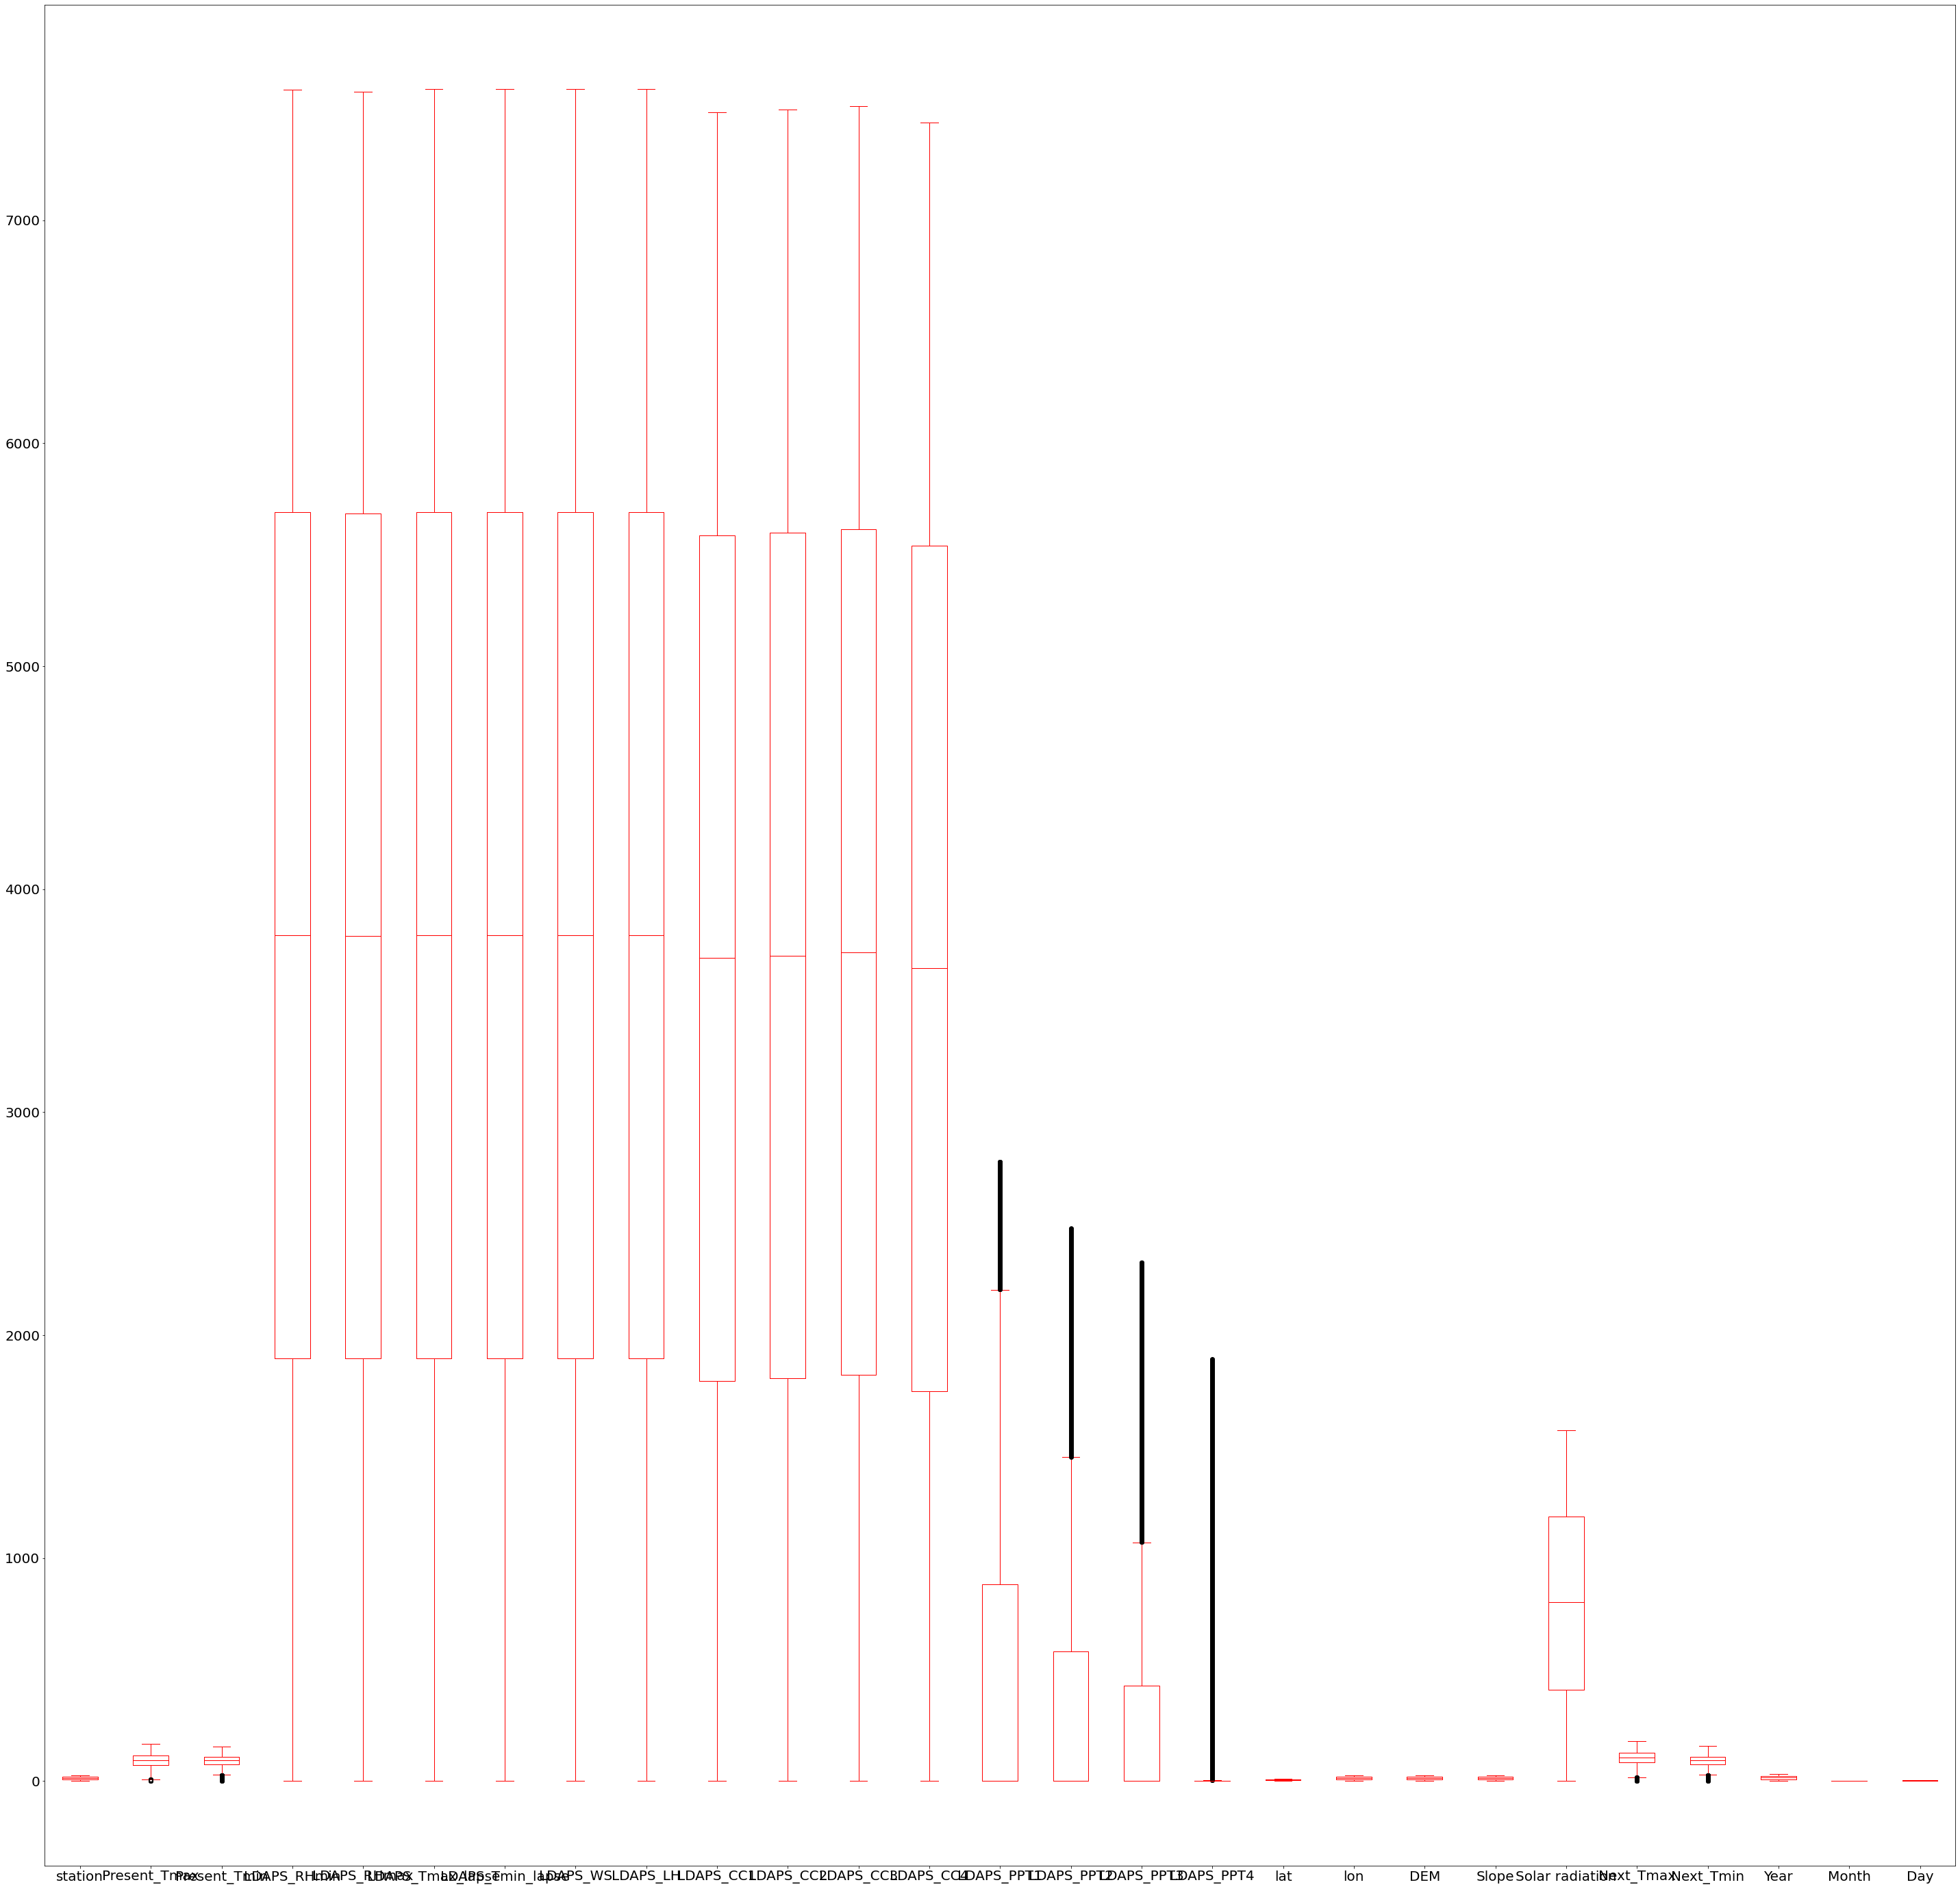

In [23]:
# Checking outliers
df.plot(kind = 'box',figsize =(50,50),fontsize =20 ,color ='r')

Here, we observe we have outliers in few columns which we need to remove before building the model.

In [24]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.66460654, 0.35370105, 0.74942881, ..., 1.57877772, 2.77335883,
        1.41176669],
       [1.52605214, 0.72551827, 0.66599584, ..., 1.57877772, 2.77335883,
        1.41176669],
       [1.38749775, 0.62434146, 0.04318437, ..., 1.57877772, 2.77335883,
        1.41176669],
       ...,
       [1.38359018, 2.17488365, 2.54323758, ..., 1.57877772, 1.01021665,
        1.42353686],
       [1.52214457, 2.17488365, 2.29293868, ..., 1.57877772, 1.01021665,
        1.42353686],
       [1.66069897, 2.20860925, 2.41808813, ..., 1.57877772, 1.01021665,
        1.42353686]])

In [25]:
threshold=3
print(np.where(z<3))

(array([   0,    0,    0, ..., 7587, 7587, 7587], dtype=int64), array([ 0,  1,  2, ..., 24, 25, 26], dtype=int64))


In [26]:
z[6][8]

1.5565174696068242

In [27]:
df_new=df[(z<3).all(axis=1)]
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,0,80,73,4400,4391,2255,2839,4278,4763,2713,...,9,11,24,22,1574,92,75,29,0,0
1,1,112,75,3224,4136,3929,4186,1928,3306,2612,...,9,16,11,9,1531,106,88,29,0,0
2,2,109,92,2450,1835,4186,4953,2925,726,2407,...,8,19,9,5,1517,112,102,29,0,0
3,3,113,93,4396,6863,3786,3230,1855,4513,2503,...,11,14,12,20,1500,118,106,29,0,0
4,4,107,78,4005,3951,3208,3426,2020,6767,1847,...,7,24,10,8,1510,113,88,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,20,24,37,18,813,2015,210,3921,55,741,...,7,17,5,10,38,77,40,29,2,4
7746,21,18,33,115,1781,1226,163,2096,5558,919,...,4,22,4,1,29,81,34,29,2,4
7747,22,26,30,43,895,1028,264,2950,4934,386,...,6,2,1,3,30,84,44,29,2,4
7748,23,26,36,14,678,1424,259,3784,2832,469,...,5,3,2,4,26,87,51,29,2,4


In [28]:
df_new.shape

(7331, 27)

In [29]:
# Checking the percentage of loss data
loss_percent =(7752-7331)/7752*100
print(loss_percent)

5.430856553147575


After the removal of outliers, we have lost 5.43 % of our data.

In [30]:
# Rechecking Skewness
df_new.skew()

station            -0.002456
Present_Tmax       -0.259127
Present_Tmin       -0.226783
LDAPS_RHmin         0.020052
LDAPS_RHmax         0.016968
LDAPS_Tmax_lapse   -0.022209
LDAPS_Tmin_lapse   -0.026473
LDAPS_WS            0.022378
LDAPS_LH            0.012933
LDAPS_CC1           0.019826
LDAPS_CC2           0.009005
LDAPS_CC3           0.021453
LDAPS_CC4           0.017927
LDAPS_PPT1          1.388499
LDAPS_PPT2          1.627423
LDAPS_PPT3          1.798026
LDAPS_PPT4          2.159482
lat                -0.335638
lon                 0.005508
DEM                 0.006306
Slope               0.006099
Solar radiation    -0.024509
Next_Tmax          -0.282508
Next_Tmin          -0.262346
Year               -0.011043
Month              -0.121985
Day                 0.038288
dtype: float64

In [31]:
# Removing skewness 
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']] = scaler.fit_transform(df[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']].values)

In [32]:
# Rechecking skewness
df_new.skew()

station            -0.002456
Present_Tmax       -0.259127
Present_Tmin       -0.226783
LDAPS_RHmin         0.020052
LDAPS_RHmax         0.016968
LDAPS_Tmax_lapse   -0.022209
LDAPS_Tmin_lapse   -0.026473
LDAPS_WS            0.022378
LDAPS_LH            0.012933
LDAPS_CC1           0.019826
LDAPS_CC2           0.009005
LDAPS_CC3           0.021453
LDAPS_CC4           0.017927
LDAPS_PPT1          1.388499
LDAPS_PPT2          1.627423
LDAPS_PPT3          1.798026
LDAPS_PPT4          2.159482
lat                -0.335638
lon                 0.005508
DEM                 0.006306
Slope               0.006099
Solar radiation    -0.024509
Next_Tmax          -0.282508
Next_Tmin          -0.262346
Year               -0.011043
Month              -0.121985
Day                 0.038288
dtype: float64

 we can observe skewness is removed.

Model 1 Taking target variable as Next_Tmax

In [33]:
# Splitting the Dataset
x = df_new.drop("Next_Tmax",axis=1)
y = df_new["Next_Tmax"]


In [34]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [35]:
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Year,Month,Day
0,-1.668011,-0.392781,-0.808816,0.294014,0.287455,-0.746267,-0.473775,0.239659,0.447938,-0.441334,...,-0.453914,1.020152,-0.131361,1.669844,1.391176,1.757728,-0.763345,1.59647,-2.801433,-1.398818
1,-1.529465,0.705117,-0.722810,-0.245581,0.170921,0.029917,0.148219,-0.836967,-0.212615,-0.487570,...,-0.453914,1.020152,0.562549,-0.131557,-0.410716,1.660260,-0.217263,1.59647,-2.801433,-1.398818
2,-1.390920,0.602189,0.008242,-0.600723,-0.880629,0.149080,0.502390,-0.380203,-1.382297,-0.581414,...,-0.453914,0.686190,0.978894,-0.408695,-0.965145,1.628526,0.370826,1.59647,-2.801433,-1.398818
3,-1.252374,0.739426,0.051245,0.292179,1.417151,-0.036388,-0.293226,-0.870412,0.334597,-0.537468,...,-0.453914,1.688074,0.284985,0.007013,1.113961,1.589992,0.538851,1.59647,-2.801433,-1.398818
4,-1.113828,0.533570,-0.593801,0.112772,0.086376,-0.304389,-0.202720,-0.794819,1.356482,-0.837771,...,-0.453914,0.352229,1.672804,-0.270126,-0.549323,1.612659,-0.217263,1.59647,-2.801433,-1.398818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7326,1.102905,-2.314102,-2.356924,-1.716621,-1.347680,-0.857548,-1.687748,0.076103,-1.686505,-1.344075,...,-0.453914,0.352229,0.701331,-0.962972,-0.272109,-1.723911,-2.233567,1.59647,1.021951,1.442419
7327,1.241450,-2.519958,-2.528936,-1.672113,-0.905307,-1.223384,-1.709451,-0.760000,0.808364,-1.262590,...,-0.453914,-0.649655,1.395240,-1.101542,-1.519573,-1.744312,-2.485605,1.59647,1.021951,1.442419
7328,1.379996,-2.245483,-2.657945,-1.705150,-1.310206,-1.315191,-1.662813,-0.368749,0.525464,-1.506587,...,-0.453914,0.018267,-1.380398,-1.517249,-1.242359,-1.742045,-2.065542,1.59647,1.021951,1.442419
7329,1.518542,-2.245483,-2.399927,-1.718456,-1.409375,-1.131578,-1.665121,0.013338,-0.427510,-1.468591,...,-0.453914,-0.315694,-1.241617,-1.378680,-1.103752,-1.751112,-1.771497,1.59647,1.021951,1.442419


In [36]:
y

0        92
1       106
2       112
3       118
4       113
       ... 
7745     77
7746     81
7747     84
7748     87
7749     79
Name: Next_Tmax, Length: 7331, dtype: int64

In [37]:
# Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif=pd.DataFrame()
Vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
Vif["Features"]=X.columns
Vif

,vif_Features,Features
0,1.232460,station
1,2.820137,Present_Tmax
2,3.371490,Present_Tmin
3,5.777013,LDAPS_RHmin
4,2.721013,LDAPS_RHmax
5,5.978517,LDAPS_Tmax_lapse
6,6.674330,LDAPS_Tmin_lapse
7,1.286249,LDAPS_WS
8,1.523284,LDAPS_LH
9,4.854967,LDAPS_CC1


we can observe multi collinearity in Solar radiation, Year  and Month .

In [38]:
X = X.drop(["Solar radiation","LDAPS_Tmin_lapse","Year","Month"],axis=1)

In [39]:
Vif=pd.DataFrame()
Vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
Vif["Features"]=X.columns
Vif

,vif_Features,Features
0,1.227719,station
1,2.634630,Present_Tmax
2,3.215537,Present_Tmin
3,4.808434,LDAPS_RHmin
4,2.631417,LDAPS_RHmax
5,4.107302,LDAPS_Tmax_lapse
6,1.226679,LDAPS_WS
7,1.464545,LDAPS_LH
8,4.691121,LDAPS_CC1
9,5.604334,LDAPS_CC2


Now, there is no multi collinearity seen in our dataset.

In [40]:
X.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Next_Tmin,Day
0,-1.668011,-0.392781,-0.808816,0.294014,0.287455,-0.746267,0.239659,0.447938,-0.441334,-0.514938,...,-0.618224,-0.559946,-0.522939,-0.453914,1.020152,-0.131361,1.669844,1.391176,-0.763345,-1.398818
1,-1.529465,0.705117,-0.722810,-0.245581,0.170921,0.029917,-0.836967,-0.212615,-0.487570,-0.284275,...,-0.618224,-0.559946,-0.522939,-0.453914,1.020152,0.562549,-0.131557,-0.410716,-0.217263,-1.398818
2,-1.390920,0.602189,0.008242,-0.600723,-0.880629,0.149080,-0.380203,-1.382297,-0.581414,-0.254349,...,-0.618224,-0.559946,-0.522939,-0.453914,0.686190,0.978894,-0.408695,-0.965145,0.370826,-1.398818
3,-1.252374,0.739426,0.051245,0.292179,1.417151,-0.036388,-0.870412,0.334597,-0.537468,-0.419174,...,-0.618224,-0.559946,-0.522939,-0.453914,1.688074,0.284985,0.007013,1.113961,0.538851,-1.398818
4,-1.113828,0.533570,-0.593801,0.112772,0.086376,-0.304389,-0.794819,1.356482,-0.837771,-0.295785,...,-0.618224,-0.559946,-0.522939,-0.453914,0.352229,1.672804,-0.270126,-0.549323,-0.217263,-1.398818


In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.7758941177525528


In [43]:
from sklearn.metrics import mean_absolute_error
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))

MSE: 231.84553198810622
MAE: 11.763949453203326
r2_score: 0.670427605467591


In [44]:
# Using SGD regressor
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7487893486085998
MSE: 232.51566436750213
MAE: 11.83185618921462
RMSE: 15.248464328170956


In [45]:
# Using LASSO
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [46]:
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
ls_predict=ls.predict(x_test)

0.7627873241494901


In [47]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.7366146810433676
MSE: 243.78429848673338
MAE: 12.140291964309656
RMSE: 15.613593388029976


In [48]:
# Using RIDGE
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'lsqr'}


In [49]:
from sklearn.linear_model import Ridge

rd=Ridge()
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
rd_predict=rd.predict(x_test)

0.775894091827772


In [50]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.749532181841622
MSE: 231.82811245943714
MAE: 11.76158465044732
RMSE: 15.225902681267772


In [51]:
# Using Random forest 
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
rf_pred=rf.predict(x_test)

0.9860789229068716


In [52]:
print('MSE:',mean_squared_error(rf_pred,y_test))
print('MAE:',mean_absolute_error(rf_pred,y_test))
print('r2_score:',r2_score(rf_pred,y_test))

MSE: 91.8740266530334
MAE: 7.248718473074301
r2_score: 0.8792734168584251


In [53]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Lasso(),
             Ridge(),
             RandomForestRegressor(),]
             
             
            


names = ['LR','L','R','RF',]

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 240.055746, 60.994788
L    : 242.433327, 56.135474
R    : 240.121130, 60.913792
RF    : 245.485837, 49.194917


In [54]:
# Hypertuning
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [55]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [56]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=100, verbose=2)

In [57]:
rf_randomized.best_params_

{'n_estimators': 644,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [58]:
rf_final=rf_randomized.best_estimator_

In [59]:
y_pred_random=rf_final.predict(x_test)

Hence, we can see that Random Forest gives us the best accuracy score of 98 %

In [60]:
# Saving the model
import pickle
file = 'TEMPERATURE PREDICTION NEXT_Tmax.pkl'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))

In [61]:
# Conclusion
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a, "predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,87,64.006712
1,112,83.889454
2,80,80.392174
3,74,93.659348
4,128,134.478729
...,...,...
1462,121,99.729283
1463,92,86.617629
1464,103,80.450419
1465,102,107.607261


Model 2 taking Target Variable as Next_Tmin.

In [82]:
y = df_new['Next_Tmin']
x = df_new.drop(columns=['Next_Tmin'], axis=1)

In [84]:
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8507593278418135  on Random_state  592


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("===============================================================================")
    print('accuracy score of ->', m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    score=cross_val_score(m,x,y,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y_test,pred)-abs(score.mean()))
    print("===============================================================================")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.8507593278418135
Mean Absolute Error:      7.442000358680329
Mean Squared error:       88.18317146505932
Root Mean Squared Error:  9.390589516375387
[0.54309392 0.82501777 0.65377639 0.74453143 0.77575314 0.84730159
 0.87457271 0.88079121]
cross validation score:   0.7681047724358827
Difference between R2 score and cross validatio score is -  0.08265455540593081
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.9174481448964112
Mean Absolute Error:      5.311287506819422
Mean Squared error:       48.778153355155474
Root Mean Squared Error:  6.984135834529242
[0.51727844 0.8155941  0.6536727  0.77515261 0.81051771 0.84106188
 0.87330049 0.88682459]
cross validation score:   0.7716753130844013
Difference between R2 score and cross validatio 

In [94]:
#Fitting the RandomForest Model 
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [96]:
#predicting the value on X_test

y_pred = reg_rf.predict(x_test)

In [97]:
reg_rf.score(x_train, y_train)

0.9865874645253284

In [98]:
reg_rf.score(x_test, y_test)

0.9163084863008871

In [99]:
# Hypereparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [100]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [101]:
rf_random = RandomizedSearchCV( estimator = reg_rf , param_distributions= random_grid , scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [102]:
rf_random.fit(x_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  21.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  21.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [103]:
rf_random.best_params_ 

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [104]:
prediction = rf_random.predict(x_test)

Hence, we can see that Random Forest gives us the best accuracy score.

In [106]:
# Saving The model
import pickle
file = 'Flight Price.pkl'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))

In [108]:
# Conclusion
rf_predict = pd.DataFrame({
    'Actual_Price' : y_test,
    'Predicted_Price' : y_pred
})

rf_predict['Error'] = rf_predict['Actual_Price'] - rf_predict['Predicted_Price']

rf_predict

,Actual_Price,Predicted_Price,Error
6028,98,100.54,-2.54
71,72,74.08,-2.08
4567,58,61.64,-3.64
6868,97,96.04,0.96
219,98,86.88,11.12
...,...,...,...
5602,128,132.93,-4.93
6568,87,89.60,-2.60
3624,103,108.63,-5.63
1,88,84.49,3.51
